In [1]:
# Import our libraries we are going to use for our data analysis.

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Libraries for random tree classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,ConfusionMatrixDisplay,classification_report

In [2]:
# Import data

df = pd.read_csv("D:/Tina/BerkleyML/Capstone/loan_test/loan_test.csv",low_memory=False,index_col=0)

In [3]:
df.head()

,loan_amount,funded_amount,investor_funds,term,interest_rate,installment,grade,sub_grade,emp_length,home_ownership,...,application_type,acc_now_delinq,year,loan_condition,region,complete_date,emp_length_int,income_category,loan_condition_int,interest_payments
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,...,INDIVIDUAL,0.0,2011,Good Loan,munster,01/12/2011,10.0,Low,0,Low
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,...,INDIVIDUAL,0.0,2011,Bad Loan,leinster,01/12/2011,0.5,Low,1,High
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,...,INDIVIDUAL,0.0,2011,Good Loan,cannught,01/12/2011,10.0,Low,0,High
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,...,INDIVIDUAL,0.0,2011,Good Loan,ulster,01/12/2011,10.0,Low,0,High
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,...,INDIVIDUAL,0.0,2011,Good Loan,ulster,01/12/2011,1.0,Low,0,Low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887379 entries, 0 to 887378
Data columns (total 55 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amount                 887379 non-null  int64  
 1   funded_amount               887379 non-null  int64  
 2   investor_funds              887379 non-null  float64
 3   term                        887379 non-null  object 
 4   interest_rate               887379 non-null  float64
 5   installment                 887379 non-null  float64
 6   grade                       887379 non-null  object 
 7   sub_grade                   887379 non-null  object 
 8   emp_length                  842554 non-null  object 
 9   home_ownership              887379 non-null  object 
 10  annual_income               887375 non-null  float64
 11  verification_status         887379 non-null  object 
 12  issue_d                     887379 non-null  object 
 13  loan_status   

In [5]:
df.shape

(887379, 55)

The data contains 887k rows and 55 rows. The data set is huge. Hence, Data Exploration is required to find out the relevent columns/ features that could be identified to build a model to accurately predict the loan status.

DATA EXPLORATION

In [6]:
# Finding the count of null values

df.isnull().sum()

loan_amount                        0
funded_amount                      0
investor_funds                     0
term                               0
interest_rate                      0
installment                        0
grade                              0
sub_grade                          0
emp_length                     44825
home_ownership                     0
annual_income                      4
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
purpose                            0
addr_state                         0
dti                                0
delinq_2yrs                       29
earliest_cr_line                  29
inq_last_6mths                    29
mths_since_last_delinq        454312
mths_since_last_record        750326
open_acc                          29
pub_rec                           29
revol_bal                          0
revol_util                       502
t

In [7]:
df.drop('earliest_cr_line', axis=1, inplace=True)

In [8]:
df.drop('mths_since_last_delinq', axis=1, inplace=True)

In [9]:
df.drop('mths_since_last_record', axis=1, inplace=True)

In [10]:
df.drop('last_pymnt_d', axis=1, inplace=True)

In [11]:
# Finding the mean of the value for emp_length_int

df.emp_length_int.mean()

6.050594383268016

In [12]:
# Filling in missing values with the above calculated Mean for the column

df['emp_length_int'].fillna(value='6.05', inplace=True)

In [13]:
df.delinq_2yrs.mean()

0.31444187750042263

In [14]:
# fill in missing values with a specified value
df['delinq_2yrs'].fillna(value='0.314', inplace=True)

In [15]:
df.drop('emp_length', axis=1, inplace=True)

In [16]:
df = df.dropna(subset=["income_category"])

In [17]:
df.income_category.unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [18]:
# create the 'income_cat' dummy variable using the 'map' method
df['income_cat'] = df.income_category.map({'Low':1, 'Medium':2, 'High':3})

In [19]:
df.interest_payments.unique()

array(['Low', 'High'], dtype=object)

In [20]:
# create the 'interest_payments' dummy variable using the 'map' method
df['interest_payment_cat'] = df.interest_payments.map({'Low':1, 'High':2})

In [21]:
# create the 'loan_condition' dummy variable using the 'map' method
df['loan_condition_cat'] = df.loan_condition.map({'Good Loan':0, 'Bad Loan':1})

In [22]:
# create the 'application_type' dummy variable using the 'map' method
df['application_type_cat'] = df.application_type.map({'INDIVIDUAL':1, 'JOINT':2})


In [23]:
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [24]:
# create the 'verification_status' dummy variable using the 'map' method
df['loan_status_cat'] = df.loan_status.map({'Fully Paid':1, 
                                            'Charged Off':2, 
                                            'Current':3,
                                           'Default':4, 
                                            'Late (31-120 days)':5, 
                                            'In Grace Period':6,
                                           'Late (16-30 days)':7, 
                                            'Does not meet the credit policy. Status:Fully Paid':8, 
                                            'Does not meet the credit policy. Status:Charged Off':9,
                                           'Issued':10})

In [25]:
# create the 'verification_status' dummy variable using the 'map' method
df['verification_status_cat'] = df.verification_status.map({'Verified':1, 'Source Verified':2, 'Not Verified':3})

In [26]:
df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [27]:
# create the 'verification_status' dummy variable using the 'map' method
df['home_ownership_cat'] = df.home_ownership.map({'RENT':1, 'OWN':2, 'MORTGAGE':3, 'OTHER':4, 'NONE':5, 'ANY':6})

In [28]:
df.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [29]:
# create the 'grade' dummy variable using the 'map' method
df['grade_cat'] = df.grade.map({'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7})

In [30]:
df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [31]:
# create the 'term' dummy variable using the 'map' method
df['term_cat'] = df.term.map({' 36 months':1, ' 60 months':2})

In [32]:
# create the 'purpose' dummy variable using the 'map' method
df['purpose_cat'] = df.purpose.map({'credit_card':1, 'car':2, 
                                            'small_business':3, 'other':4,
                                            'wedding':5, 'debt_consolidation':6,
                                            'home_improvement':7, 'major_purchase':8,
                                            'medical':9, 'moving':10,
                                            'vacation':11, 'house':12,
                                            'renewable_energy':13, 'educational':14})

In [33]:
df['income_cat'] = df['income_cat'].astype(int)
df['home_ownership_cat'] = df['home_ownership_cat'].astype(int)
df['verification_status_cat'] = df['verification_status_cat'].astype(int)
df['loan_status_cat'] = df['loan_status_cat'].astype(int)
df['application_type_cat'] = df['application_type_cat'].astype(int)
df['interest_payment_cat'] = df['interest_payment_cat'].astype(int)
df['loan_condition_cat'] = df['loan_condition_cat'].astype(int)
df['purpose_cat'] = df['purpose_cat'].astype(int)
df['grade_cat'] = df['grade_cat'].astype(int)
df['term_cat'] = df['term_cat'].astype(int)

VISUALIZATIONS
After creating dummay variables and appropriately converting the data type of the features, the graphs needs to be plotted to provide information and compare the data yearwise.

In [34]:
# Create a dataframe to aggregate data based on year

df_year=df.groupby('year').loan_amount.agg(['count', 'mean', 'min', 'max'])

In [35]:
df1= pd.DataFrame(df_year)
df1

,count,mean,min,max
year,,,,
2007,599,8267.570952,500,25000
2008,2393,8825.428333,500,25000
2009,5281,9833.033516,1000,25000
2010,12537,10528.240408,1000,25000
2011,21721,12047.503568,1000,35000
2012,53367,13461.709015,1000,35000
2013,134755,14708.094134,1000,35000
2014,235628,14870.177462,1000,35000
2015,421094,15240.255561,1000,35000


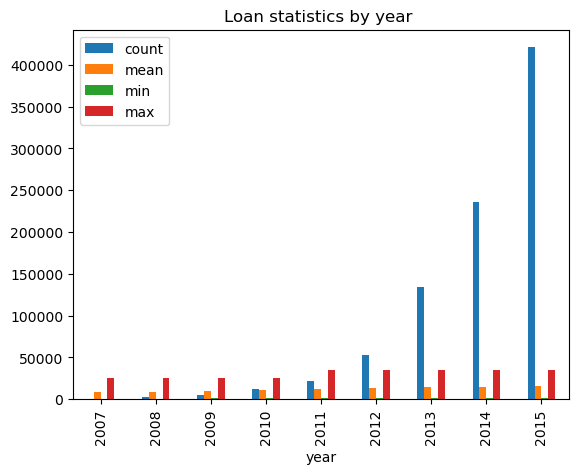

In [36]:
plotByYear = df1.plot(kind='bar', title='Loan statistics by year ')

In [37]:
# Creating dataframe for Bad loans and Good Loans
badloans_df = df.loc[df["loan_condition_cat"] == 1]
goodloans_df = df.loc[df["loan_condition_cat"] == 0]

In [38]:
# loan_status cross
loan_status_by_year = pd.crosstab(badloans_df['year'], badloans_df['loan_condition_cat']).apply(lambda x: x/x.sum() * 100)
loan_status_by_year

loan_condition_cat,1
year,
2007,0.234321
2008,0.735589
2009,1.072239
2010,2.611636
2011,4.891071
2012,12.522802
2013,26.835635
2014,33.156357
2015,17.940352


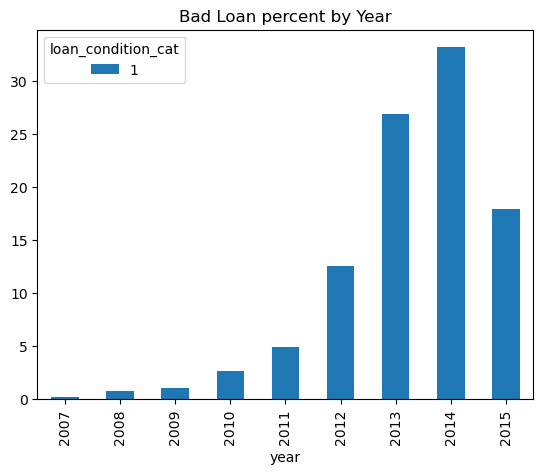

In [39]:
badLoan = loan_status_by_year.plot(kind='bar', title='Bad Loan percent by Year')

In [40]:
# Finding average interest rates by year

avggInterestRate = df.groupby('year').interest_rate.mean()

avggInterestRate

year
2007    11.851803
2008    12.061964
2009    12.437247
2010    11.985268
2011    12.223746
2012    13.637676
2013    14.531745
2014    13.771245
2015    12.601731
Name: interest_rate, dtype: float64

<Axes: title={'center': 'Average interest rates by year charged to customers '}, xlabel='year'>

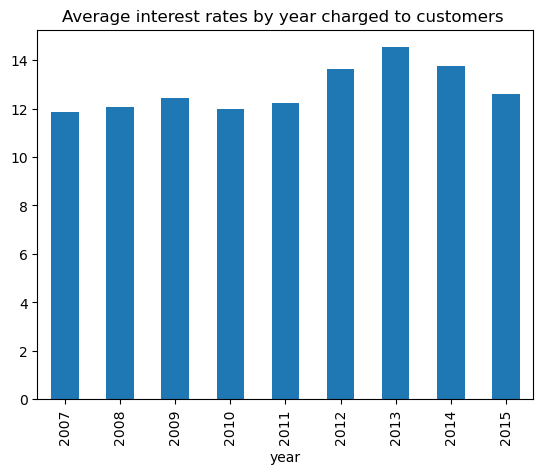

In [41]:
avggInterestRate.plot(kind='bar', x='year', y='interest rate', title='Average interest rates by year charged to customers ')

It is observed that as average interest rates for loans started to increaase over the years, the number of Bad Loans also increased. This can be also supported by the claim that Debt-Income ratio of the customers increased.

In [42]:
dtiRatio = df.groupby('year').dti.mean()
dtiRatio

year
2007    10.769349
2008    13.204605
2009    12.466548
2010    13.095154
2011    13.846331
2012    16.661354
2013    17.216032
2014    18.040782
2015    19.196014
Name: dti, dtype: float64

<Axes: title={'center': 'Average debt income ratio per year charged to customers '}, xlabel='year'>

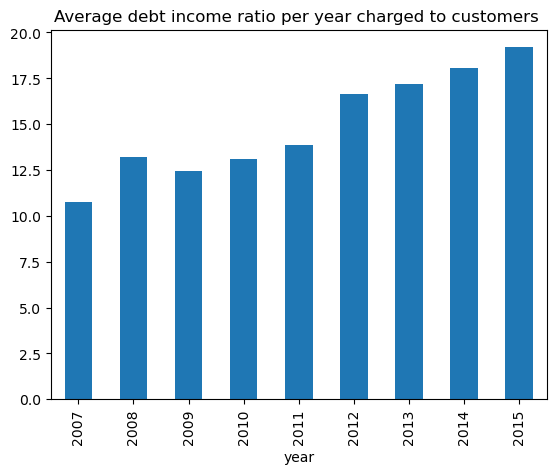

In [43]:
dtiRatio.plot(kind='bar', x='year', y='debt income ratio ', title='Average debt income ratio per year charged to customers ')

FEATURE SELECTION

Feature selection, also known as variable selection, is the process of selecting a subset of relevant features (variables, predictors) to efficiently train a Machine Learning Model which would most accurately predict the loan status.

In [44]:
# create a list of features
feature_cols = ['emp_length_int', 'annual_income','loan_amount','interest_rate','dti','home_ownership_cat','income_cat','total_pymnt','purpose_cat','grade_cat',
               'application_type_cat','term_cat','year']

In [45]:
X = df[feature_cols]
y = df.loan_condition_cat

<Axes: >

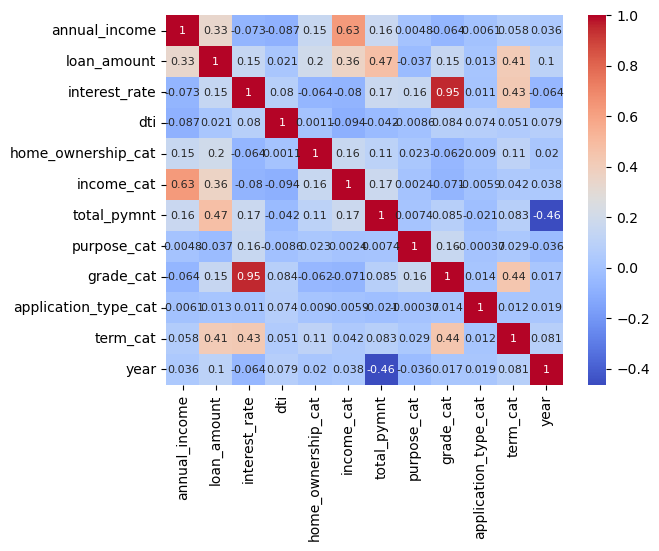

In [46]:
X_corr =X.corr()

sns.heatmap(X_corr, cmap='coolwarm', annot_kws={"size":8},annot=True) 

In [47]:
# import class, instantiate estimator, fit with all data

rfclf = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True, random_state=1)
rfclf.fit(X,y)

RandomForestClassifier(max_features=3, oob_score=True, random_state=1)

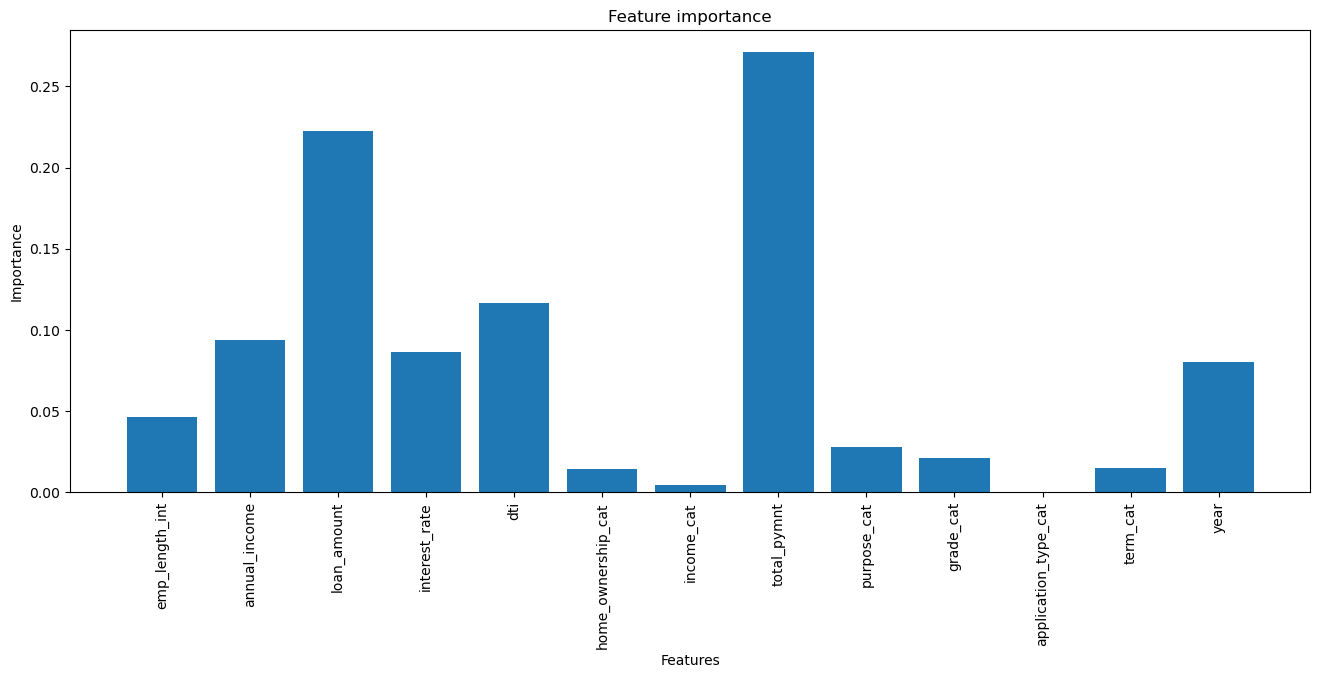

In [48]:
feature_importance = rfclf.feature_importances_
features = feature_cols
plt.figure(figsize=(16, 6))


plt.bar(range(len(feature_importance)), feature_importance, align='center')
plt.xticks(range(len(feature_importance)), features, rotation='vertical')
plt.title('Feature importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()

From the above graph, we find that some features largely impact the performance , whereas other features has less influence. The features- emp_length_int, annual_income, loan_amount, interest_rate, dti,total_payment, year have considerable influence over the other features.
Therefore, we could at this point reduce the number of features by taking a subset of the most important features.

Finding the RMSE for the features selected

In [49]:
# create a updated list of features
feature_col = ['emp_length_int', 'annual_income','loan_amount','interest_rate','total_pymnt','dti','year']

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
    X = df[feature_cols]
    y = df.loan_condition_cat
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [51]:
print (train_test_rmse(['emp_length_int', 'annual_income','loan_amount','interest_rate','total_pymnt','dti','year']))

0.2527466783323038


In [52]:
print (train_test_rmse(['emp_length_int', 'annual_income','loan_amount','interest_rate','dti','home_ownership_cat','income_cat','total_pymnt','purpose_cat','grade_cat',
               'application_type_cat','term_cat','year']))

0.25171208104174


Seems like there is not much diffrence in RMSE between selecting the intiail features (feature_cols) and subset of features (feature_col).

In [53]:
X = df[feature_col]
y = df.loan_condition_cat

In [54]:
# spilt X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

LOGISTIC REGRESSION

In [55]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
Logreg = LogisticRegression()
Logreg.fit(X_train, y_train)

LogisticRegression()

In [56]:
# make class prediction for the testing set
y_pred_class = Logreg.predict(X_test)

In [57]:
# calculate Accuracy

print((metrics.accuracy_score(y_test, y_pred_class))*100)

92.37842808459999


KNN NEIGHBORS

In [58]:
from sklearn.neighbors import KNeighborsClassifier

# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print ((metrics.accuracy_score(y_test, y_pred))*100)

91.78747227781685


In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96    205043
           1       0.19      0.03      0.04     16801

    accuracy                           0.92    221844
   macro avg       0.56      0.51      0.50    221844
weighted avg       0.87      0.92      0.89    221844



In [60]:
from sklearn.model_selection import cross_val_score

# 10-fold cross-validation with K=20 for KNN (the n_neighbors parameter)

knn = KNeighborsClassifier(n_neighbors=20)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print (scores.mean())

0.9177743307595894


RANDOM FOREST

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=100, max_features=3, oob_score=True, random_state=1)
rfclf.fit(X_train, y_train)

In [ ]:
print((rfclf.oob_score_)*100,'Percent')

In [ ]:

#confusion_mat = confusion_matrix(cancer_y_test, cancer_preds, labels=[1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=rfclf.predict(X_test)

In [ ]:
confusion_mat = confusion_matrix(y_test, y_pred)

In [ ]:
# Matrix for Random Forest Classifier
print(classification_report(y_test, y_pred))

ACCURACY COMPARISION AMONG THE MODELS BASED ON SCORES AND SELECTING THE BEST MODEL

In [ ]:
df2 = pd.DataFrame(np.array([['LOGISTIC REGRESSION',92.38 ],['KNN NEIGHBORS', 91.78],['RANDOM FOREST',95.84]]),
                   columns=['Model','% Accuracy Measure'])


In [ ]:
df2